In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
df['year'] = df['Day'].map(lambda x: x.year )
df.head()

,Day,t,year
0,2008-01-01,0,2008
1,2008-01-02,-5,2008
2,2008-01-03,-11,2008
3,2008-01-04,-11,2008
4,2008-01-05,-12,2008


In [5]:
group_year = df.groupby(['year']).mean()
group_year

,t
year,
2008,8.545205
2009,7.610959
2010,7.117808
2011,8.337912
2012,6.980822
2013,8.728767
2014,8.931507
2015,9.079452
2016,7.907104


In [6]:
# самый холодный год
print(group_year['t'].idxmin())
print(group_year['t'].min())

2012
6.980821917808219


In [7]:
# самый теплый год
print(group_year['t'].idxmax())
print(group_year['t'].max())

2015
9.07945205479452


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [8]:
years = sorted(list(set(list(df['year'].values))))

In [9]:
df['month'] = df['Day'].apply(lambda x: x.month)
df_jan = df.loc[df['month'] == 1]

In [10]:
warm = []
for i in years:
    d = df_jan.loc[df_jan['year'] == i]
    d = d.loc[d['t'] >= 0]
    warm.append(d['t'].count())
days_jan = sorted(list(zip(warm, years)))
days_jan[-1]

(19, 2008)

**3.** В каком году было самое холодное лето (по средней температуре)

In [11]:
df_sum = df.loc[df['month'].isin([6, 7, 8])]
mean_t = []
for i in years:
    d = df_sum.loc[df_sum['year'] == i]
    mean_t.append(d['t'].mean())
t_sum = sorted(list(zip(mean_t, years)))
t_sum[0]

(18.119565217391305, 2008)

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [12]:
#создал столбец для температуры следующего дня
df['t_next'] = df['t'].shift(-1)

In [13]:
df.head()

,Day,t,year,month,t_next
0,2008-01-01,0,2008,1,-5.0
1,2008-01-02,-5,2008,1,-11.0
2,2008-01-03,-11,2008,1,-11.0
3,2008-01-04,-11,2008,1,-12.0
4,2008-01-05,-12,2008,1,-14.0


In [14]:
#день с наибольшей разницей
ind = (df['t'] - df['t_next']).abs().idxmax()
df['Day'][ind]

Timestamp('2014-05-26 00:00:00')

In [15]:
#сама разница
(df['t'] - df['t_next']).abs().max()

15.0

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<BarContainer object of 9 artists>

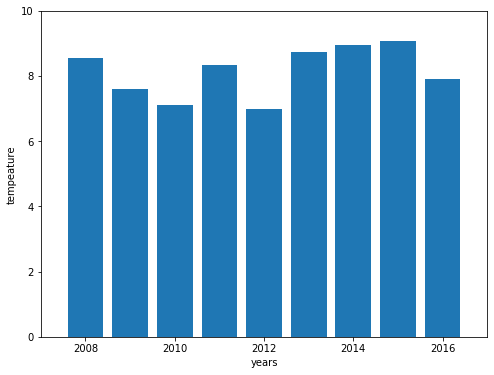

In [16]:
names = years
values = group_year['t']

plt.figure(figsize=(8, 6))
plt.xlabel('years')
plt.ylabel('tempeature')
plt.axis([2007, 2017, 0, 10])

plt.bar(names, values)